In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import AUC

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
w_grid = 10
l_grid = 10

In [7]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

<ipython-input-8-e823339b9ae9>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


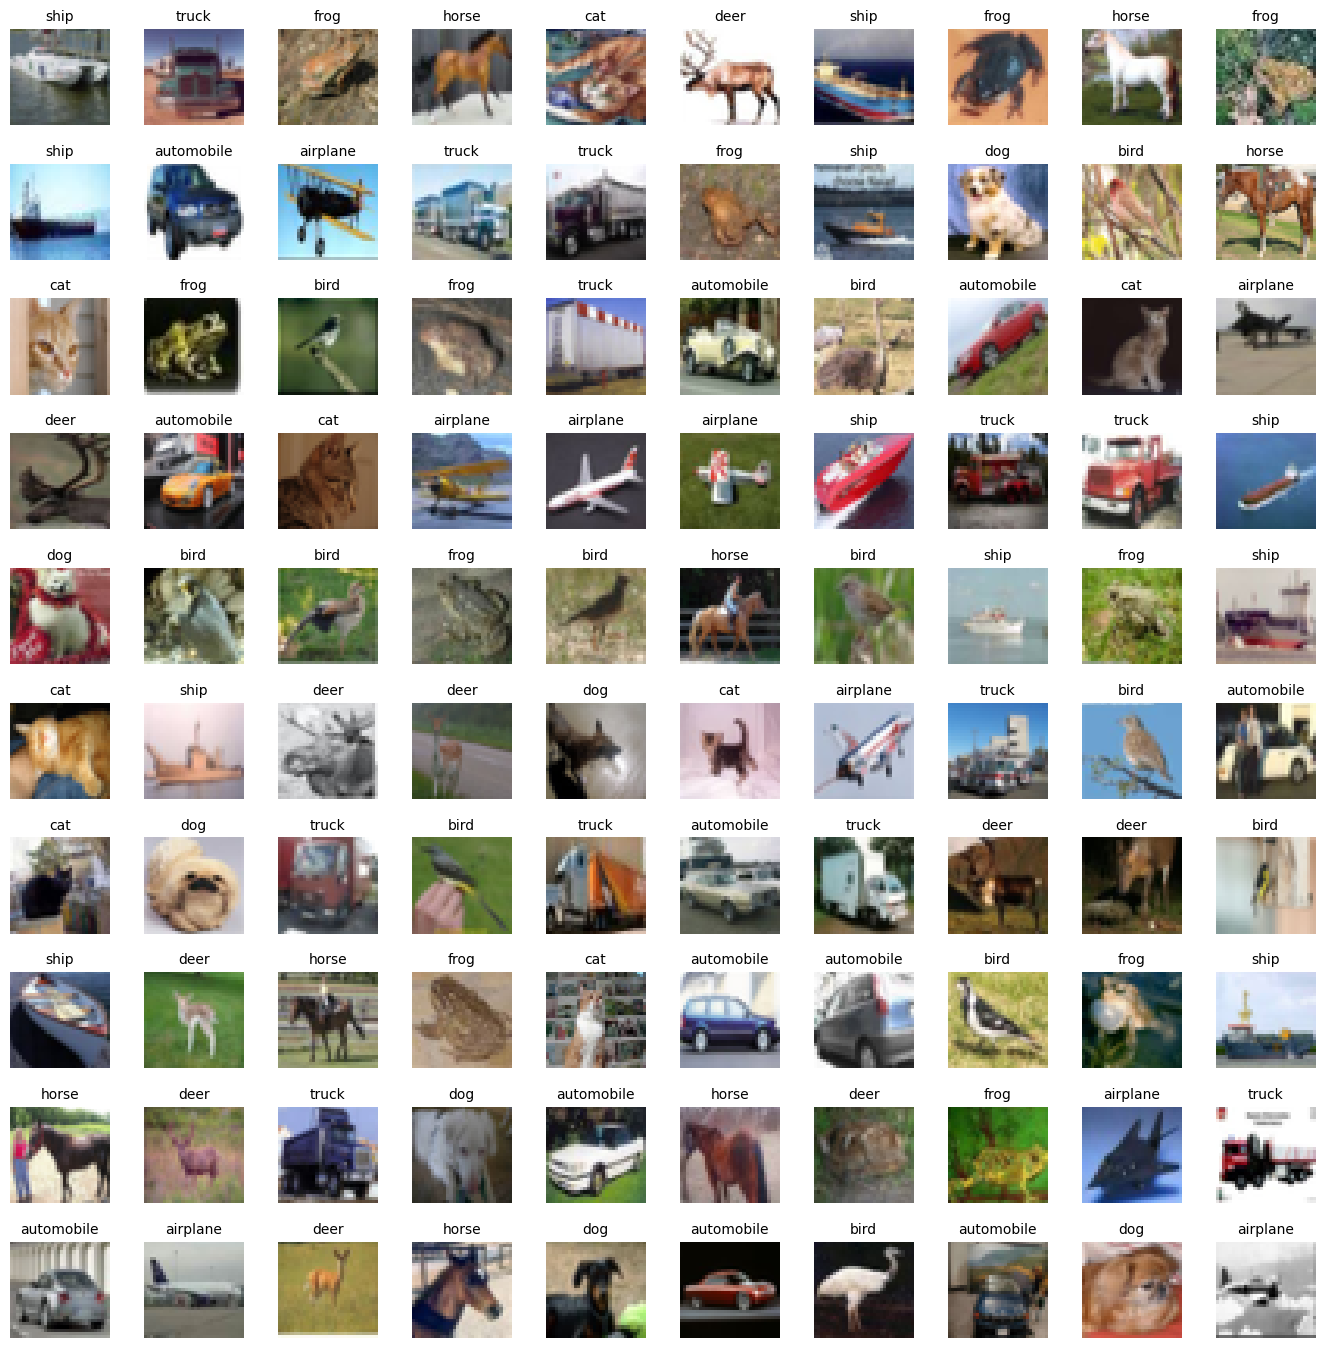

In [8]:
fig, axes = plt.subplots(l_grid,w_grid, figsize = (17,17))
axes = axes.ravel()
n_train = len(x_train)


for i in np.arange(0, l_grid*w_grid):
    index = np.random.randint(0,n_train)
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize =10)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [11]:
y_train[0]

array([6], dtype=uint8)

In [12]:
y_train = to_categorical(y_train)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
# CNN_modEL_BUILDING

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = (32,32,3), activation='relu', padding = "same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding ='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding ="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu',padding ='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu',padding ="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu',padding ='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation= 'softmax'))



metrics = ['accuracy',
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name="recall")]

model.compile(loss="categorical_crossentrophy", optimizer="adam", metrics = metrics)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [ ]:
 model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2, verbose =1)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)